Loading iris with c = .000001...
Loading iris with c = .00001...


		  IRIS DATA


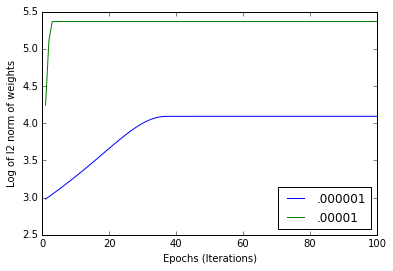

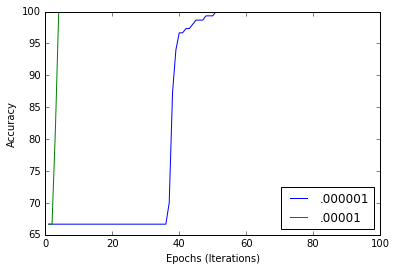

Loading cifar with c = .001...
Loading cifar with c = .0001...


		 CIFAR-10 DATA


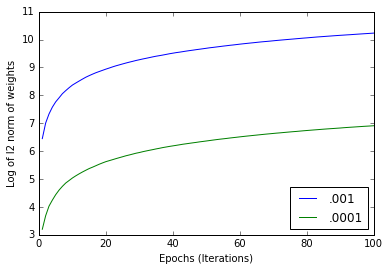

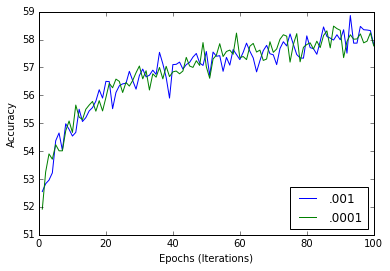

finished


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas
import math


def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
        
class Perceptron:
    
    def __init__(self, features, labels, learningRate):
        self.features = features
        self.labels = labels
        self.weights = (np.random.rand(1,np.shape(features)[1])*0.1-0.01)[0]
        self.c = learningRate
        
        
    def train(self):
        normsAtEachIter = []
        accuracyAtEachIter = []
        accuracyCount = 0.0
        instances = len(self.features)
        
        iterations = 100
        
        for i in range(0, iterations):
            accuracyCount = 0.0
            
            # for each feature get the expected output
            for f in range(instances):
                instance = self.features[f]
                dotProduct = self.weights.dot(instance)
                
                # if the dot product is >= theta z is 1, 0 otherwise
                theta = self.weights[-1]
                
                # currentOutput is 'z' in the algorithm
                currentOutput = 0
                if dotProduct >= theta:
                    currentOutput = 1
                
                # get the target for the data
                target = self.labels[f][0]
                
                if target != currentOutput:
                    # find the weight change for each of the weights
                    changeOfWeights = self.c * (self.labels[f, :] - currentOutput) * instance
                    self.weights[0:] = self.weights[0:] + changeOfWeights[0:]
                else:
                    accuracyCount += 1
            norm = math.sqrt(self.weights.dot(self.weights.T))
            normsAtEachIter.append(abs(math.log(norm,2)))
            accuracyAtEachIter.append(accuracyCount/instances * 100)
            #print "Iteration ", i, "Accuracy: ", accuracyCount/instances * 100, "% Norm: ", norm, " log of Norm:", math.log(norm,2)
        
        return normsAtEachIter, accuracyAtEachIter       
                     
        
    def predict(self):
        return "prediction"
        

#Open file to read iris data
data = pandas.read_csv( 'iris-data-simple.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
labels = np.atleast_2d( labels ).T
features = m[:,1:5]
features = np.append(features, np.ones([len(features), 1]), 1)

print "Loading iris with c = .000001..."
learningRate = .000001
perceptron = Perceptron(features, labels, learningRate)
listOfNormValues_1, listOfAccuracyValues_1 = perceptron.train()
listOfIterations = range(1, 101)

print "Loading iris with c = .00001..."
learningRate = .00001
perceptron = Perceptron(features, labels, learningRate)
listOfNormValues_2, listOfAccuracyValues_2 = perceptron.train()

print "\n\n\t\t  IRIS DATA"
plt.plot(listOfIterations, listOfNormValues_1)
plt.plot(listOfIterations, listOfNormValues_2)

plt.legend(['.000001', '.00001'], loc='lower right')
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Log of l2 norm of weights")
plt.show()

plt.plot(listOfIterations, listOfAccuracyValues_1)
plt.plot(listOfIterations, listOfAccuracyValues_2)

plt.legend(['.000001', '.00001'], loc='lower right')
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Accuracy")
plt.show()


#read in cifar data
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

features = np.append(features, np.ones([len(features), 1]), 1)


print "Loading cifar with c = .001..."
learningRate = .001
perceptron = Perceptron(features, labels, learningRate)
listOfNormValues_1, listOfAccuracyValues_1 = perceptron.train()
listOfIterations = range(1, 101)


print "Loading cifar with c = .0001..."
learningRate = .0001
perceptron = Perceptron(features, labels, learningRate)
listOfNormValues_2, listOfAccuracyValues_2 = perceptron.train()

print "\n\n\t\t CIFAR-10 DATA"

plt.plot(listOfIterations, listOfNormValues_1)
plt.plot(listOfIterations, listOfNormValues_2)

plt.legend(['.001', '.0001'], loc='lower right')
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Log of l2 norm of weights")
plt.show()

plt.plot(listOfIterations, listOfAccuracyValues_1)
plt.plot(listOfIterations, listOfAccuracyValues_2)

plt.legend(['.001', '.0001'], loc='lower right')
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Accuracy")
plt.show()

print "finished"